<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
!pip install pandas matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


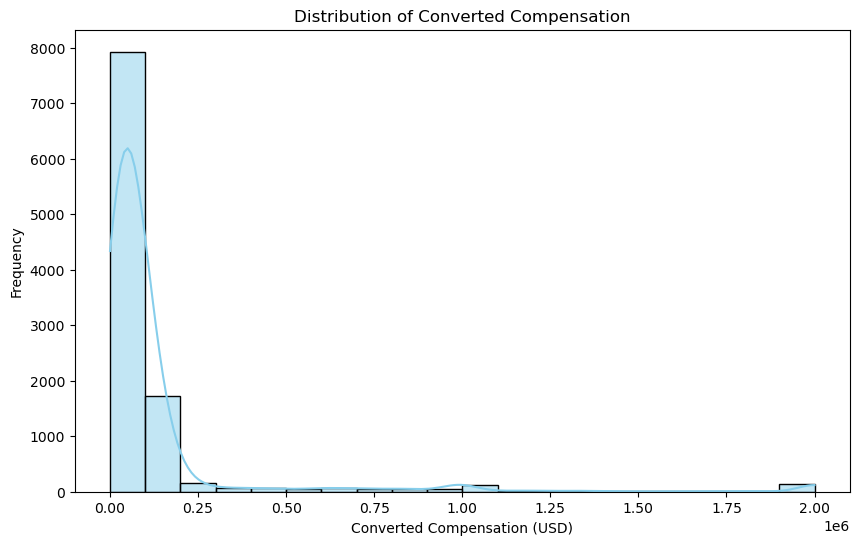

In [5]:
# your code goes here
# Plot the distribution curve for the 'ConvertedComp' column
#plt.figure(figsize=(10, 6))
#plt.hist(df['ConvertedComp'], bins=50, color='skyblue', edgecolor='black')
#plt.title('Distribution of Converted Compensation')
#plt.xlabel('Converted Compensation (USD)')
#plt.ylabel('Frequency')
#plt.grid(True)
#plt.show()


# We can directly plot the distribution using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'], bins=20, kde=True, color='skyblue')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Converted Compensation')
plt.show()

Plot the histogram for the column `ConvertedComp`.


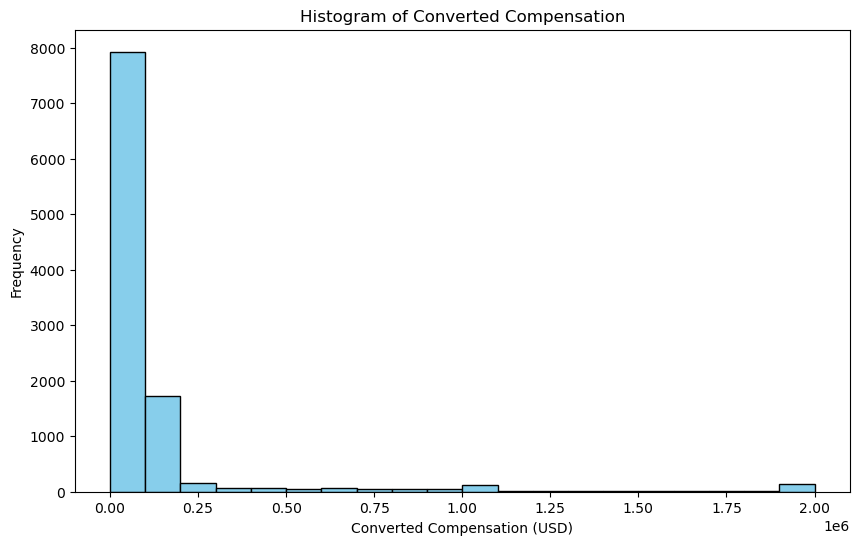

In [6]:
# your code goes here
# Plot the histogram for the 'ConvertedComp' column
#plt.figure(figsize=(10, 6))
#plt.hist(df['ConvertedComp'], bins=50, color='skyblue', edgecolor='black')
#plt.title('Histogram of Converted Compensation')
#plt.xlabel('Converted Compensation (USD)')
#plt.ylabel('Frequency')
#plt.grid(True)
#plt.show()


plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=20, color='skyblue', edgecolor='black') # You can adjust the number of bins as per your preference
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')
plt.show()


What is the median of the column `ConvertedComp`?


In [7]:
# your code goes here
# Calculate the median of the 'ConvertedComp' column
median_converted_comp = df['ConvertedComp'].median()

# Display the median
print("Median of the 'ConvertedComp' column:", median_converted_comp)


Median of the 'ConvertedComp' column: 57745.0


How many responders identified themselves only as a **Man**?


In [16]:
# your code goes here
# Count the number of responders who identified themselves only as a Man
num_man_only_responders = df[(df['Gender'] == 'Man')].shape[0]

# Display the result
print("Number of responders who identified themselves only as a Man:", num_man_only_responders)



Number of responders who identified themselves only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [18]:
# your code goes here
# Filter responders who identified themselves only as a Woman
woman_only_responders = df[(df['Gender'] == 'Woman')]

# Calculate the median 'ConvertedComp' for responders identified as Woman only
median_converted_comp_woman_only = woman_only_responders['ConvertedComp'].median()

# Display the result
print("Median ConvertedComp of responders identified as Woman only:", median_converted_comp_woman_only)


Median ConvertedComp of responders identified as Woman only: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [19]:
# your code goes here
# Calculate the five-number summary for the 'Age' column
age_summary = df['Age'].describe()

# Display the five-number summary
print("Five-number summary for the 'Age' column:")
print(age_summary)




Five-number summary for the 'Age' column:
count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


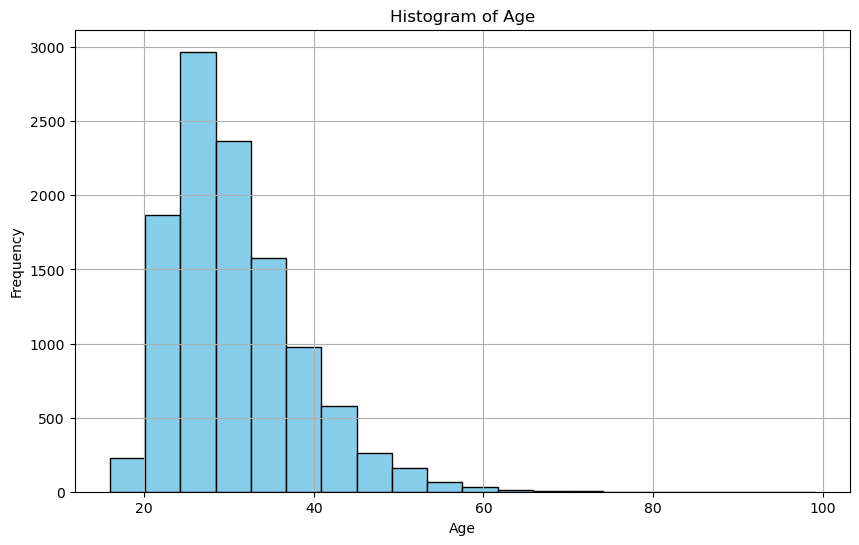

In [20]:
# your code goes here
# Plot the histogram for the 'Age' column
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


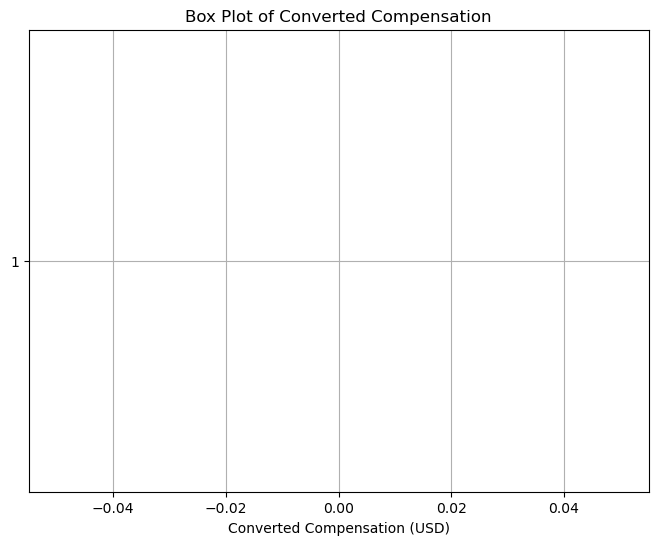

In [21]:
# your code goes here
# Create a box plot for the 'ConvertedComp' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['ConvertedComp'], vert=False, sym='b.')
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.grid(True)
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [22]:
# your code goes here
# Calculate the Interquartile Range (IQR) for the 'ConvertedComp' column
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Display the Interquartile Range (IQR)
print("Interquartile Range (IQR) for the 'ConvertedComp' column:", IQR)



Interquartile Range (IQR) for the 'ConvertedComp' column: 73132.0


Find out the upper and lower bounds.


In [23]:
# your code goes here
# Calculate the Interquartile Range (IQR) for the 'ConvertedComp' column
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper and lower bounds for potential outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Display the upper and lower bounds
print("Upper Bound (UB) for potential outliers:", upper_bound)
print("Lower Bound (LB) for potential outliers:", lower_bound)



Upper Bound (UB) for potential outliers: 209698.0
Lower Bound (LB) for potential outliers: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [24]:
# your code goes here
# Calculate the Interquartile Range (IQR) for the 'ConvertedComp' column
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper and lower bounds for potential outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers in the 'ConvertedComp' column
outliers = df[(df['ConvertedComp'] > upper_bound) | (df['ConvertedComp'] < lower_bound)]

# Count the number of outliers
num_outliers = len(outliers)

# Display the number of outliers
print("Number of outliers in the 'ConvertedComp' column:", num_outliers)



Number of outliers in the 'ConvertedComp' column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [27]:
# your code goes here
# Create a new DataFrame by removing outliers from the 'ConvertedComp' column
df_no_outliers = df[~((df['ConvertedComp'] > upper_bound) | (df['ConvertedComp'] < lower_bound))]

# Display the new DataFrame without outliers
print(df_no_outliers)


       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
5              19  I am a developer by profession      Yes   
...           ...                             ...      ...   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   
11397       25142  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than once per ...   
4      Less tha

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [30]:
# your code goes here
# Calculate the correlation between 'Age' and all other numerical columns
correlation = df.corr()['Age']

# Display the correlation values
print("Correlation between Age and other numerical columns:")
print(correlation)


Correlation between Age and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


/var/folders/ml/dhf4n9093pz61jq1_65chvp80000gn/T/ipykernel_10568/2586249252.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['Age']


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
